# UNDERSTANDING AND  PREDICTING FOOTBALL MATCH OUTCOME

# NNAKUDE MIRACLE

# Abuja Nigeria.

   **miraclennakude@gmail.com**

*The English Premier League (EPL) was established in 1992, revolutionizing football in England and beyond. It emerged from the decision of the* *top-tier clubs in the Football League First Division to break away and form a more lucrative competition. The primary driver for this shift *was* the growing influence of television broadcasting rights, which promised to generate unprecedented revenue.*

*The league's inaugural season kicked off on August 15, 1992, featuring 22 clubs. Since then, it has become one of the most watched and* *financially successful sports leagues in the world. The EPL replaced the First Division as the highest level of the English football league* *system, while the Football League continued as a lower-tier competition.*
*The Premier League’s global appeal lies in its diverse player base, fast-paced games, and unpredictable outcomes. Partnerships with* *broadcasters and sponsors have also cemented its reputation as a global football powerhous*

In [1]:
#Import libraries
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.gridspec as gridspec
from numpy import random
import scipy.stats as scipy
from IPython.display import display
from sklearn.metrics import accuracy_score

In [ ]:
#Load the dataset
mf = pd.read_csv("Merged_dataset.csv")
mf.head()

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,Charlton,Man City,4,0,H,2,0,H,17,...,14,4,13,12,6,6,1,2,0,0
1,1,Chelsea,West Ham,4,2,H,1,0,H,17,...,10,5,19,14,7,7,1,2,0,0
2,2,Coventry,Middlesbrough,1,3,A,1,1,D,6,...,3,9,15,21,8,4,5,3,1,0
3,3,Derby,Southampton,2,2,D,1,2,A,6,...,4,6,11,13,5,8,1,1,0,0
4,4,Leeds,Everton,2,0,H,2,0,H,17,...,8,6,21,20,6,4,1,3,0,0


In [3]:
mf.columns

Index(['Unnamed: 0', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR'],
      dtype='object')

In [4]:
mf.shape

(6080, 21)

In [5]:
mf.dtypes

Unnamed: 0     int64
HomeTeam      object
AwayTeam      object
FTHG           int64
FTAG           int64
FTR           object
HTHG           int64
HTAG           int64
HTR           object
HS             int64
AS             int64
HST            int64
AST            int64
HF             int64
AF             int64
HC             int64
AC             int64
HY             int64
AY             int64
HR             int64
AR             int64
dtype: object

In [ ]:
#Check for null values
mf.isnull().sum()

Unnamed: 0    0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
HS            0
AS            0
HST           0
AST           0
HF            0
AF            0
HC            0
AC            0
HY            0
AY            0
HR            0
AR            0
dtype: int64

In [7]:
# Count of teams in the league.
if 'HomeTeam' in mf.columns and 'AwayTeam' in mf.columns:
    # Combine HomeTeam and AwayTeam columns into a single series
    all_teams = pd.concat([mf['HomeTeam'], mf['AwayTeam']])

    # Get the distinct count of teams and their names
    distinct_teams = all_teams.unique()
    distinct_count = len(distinct_teams)

    # Print the results
    print(f"Distinct count of teams: {distinct_count}")
    print("Team names:")
    for team in distinct_teams:
        print(team)
else:
    print("The dataset does not include 'HomeTeam' and 'AwayTeam' columns.")


Distinct count of teams: 20
Team names:
Charlton
Chelsea
Coventry
Derby
Leeds
Leicester
Liverpool
Sunderland
Tottenham
Man United
Arsenal
Bradford
Ipswich
Middlesbrough
Everton
Man City
Newcastle
Southampton
West Ham
Aston Villa


# Meaning of the abbreviations in the dataset

In [8]:
    #FTHG - Full Time Home Goal
    #FTAG - Half Time Away Goal
    #FTR - Full Time Result
    #HTHG - Half Time Home Goal
    #HTAG - Half Time Away Goal
    #HTR - Half Time Result
    #HS - Home Shots
    #AS - Away Shots
    #HST - Home Shots on Target
    #AST - Away Shots on Target
    #HF - Home Team Foul
    #AF - Away Team Foul
    #HC - Home Team Corner
    #AC - Away Team Corner
    #HY - Home Team Yellow Card
    #AY - Away Team Yellow Card
    #HR - Home Team Red Card
    #AR - Away Team Red Card

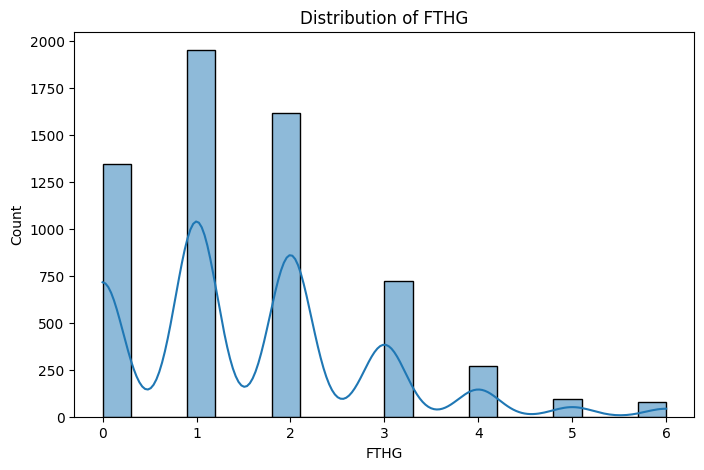

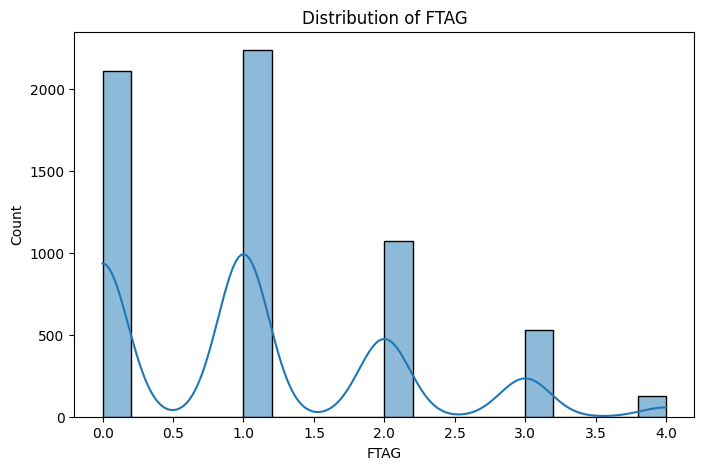

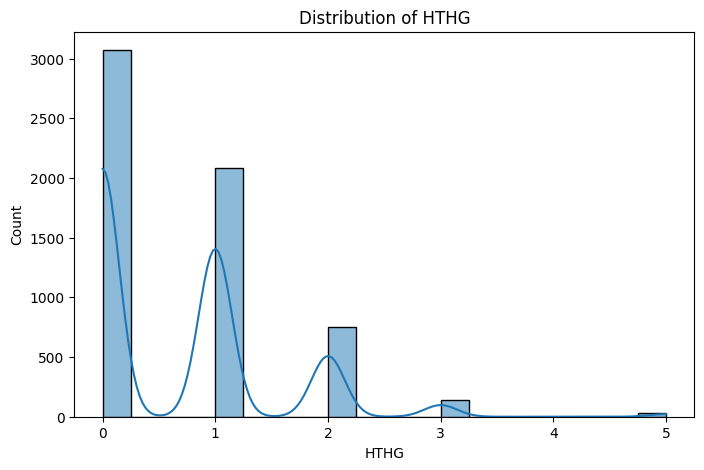

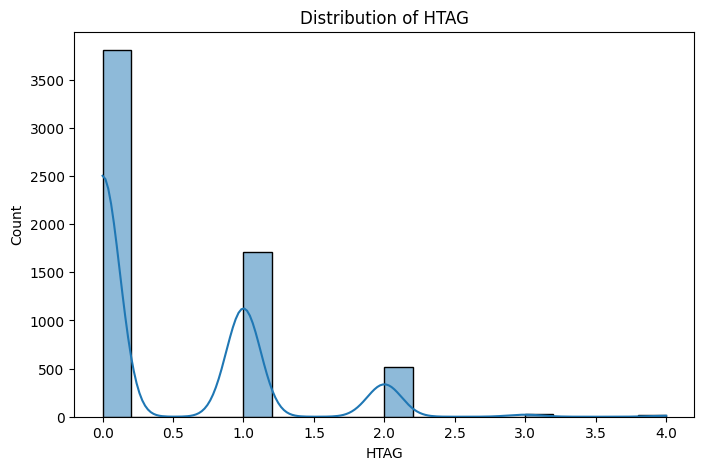

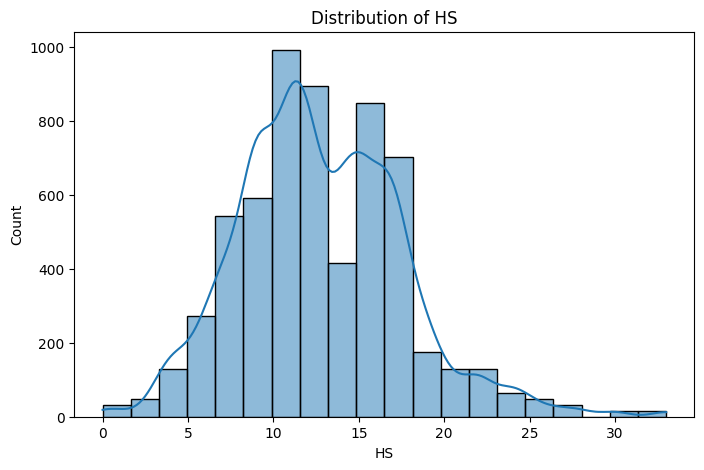

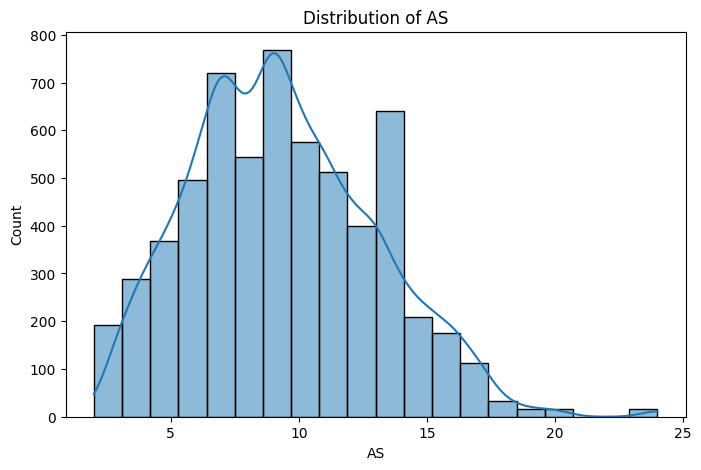

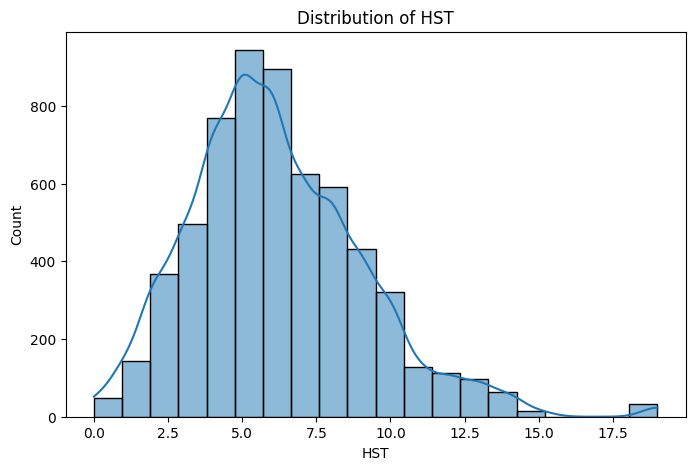

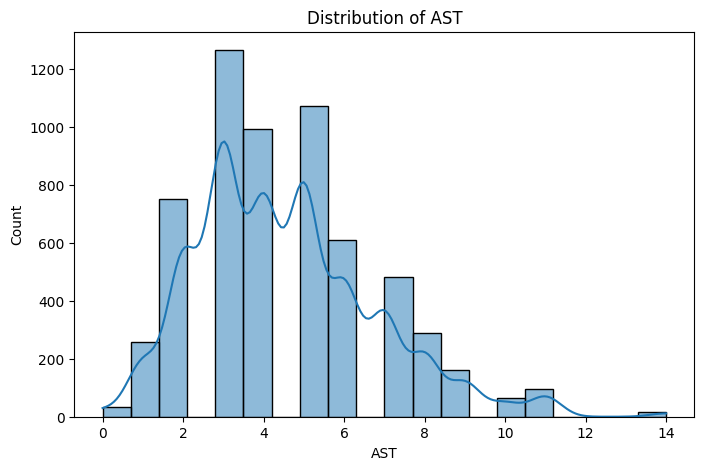

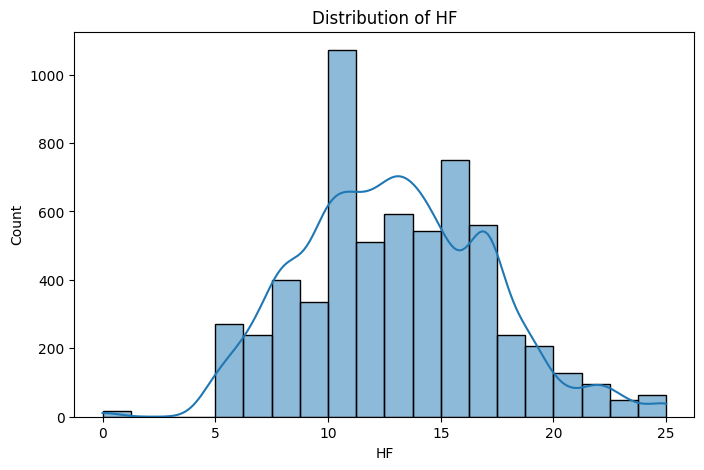

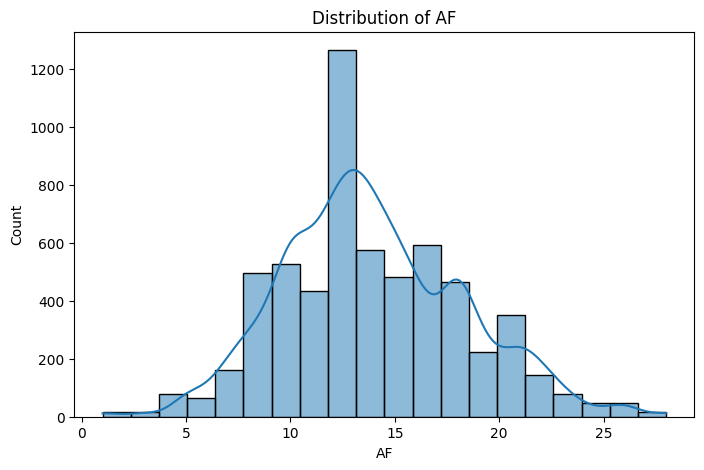

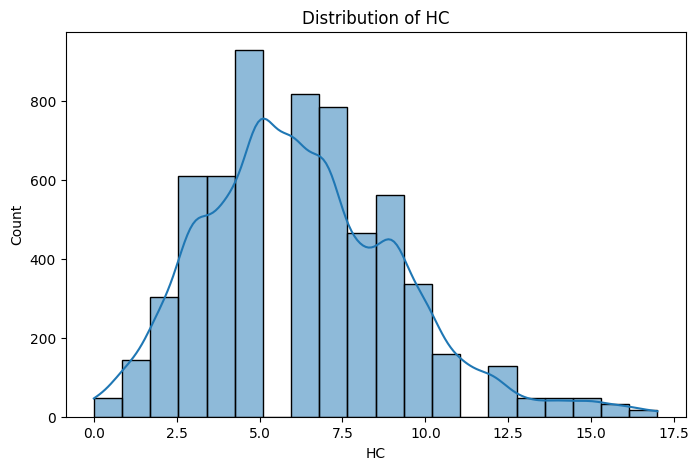

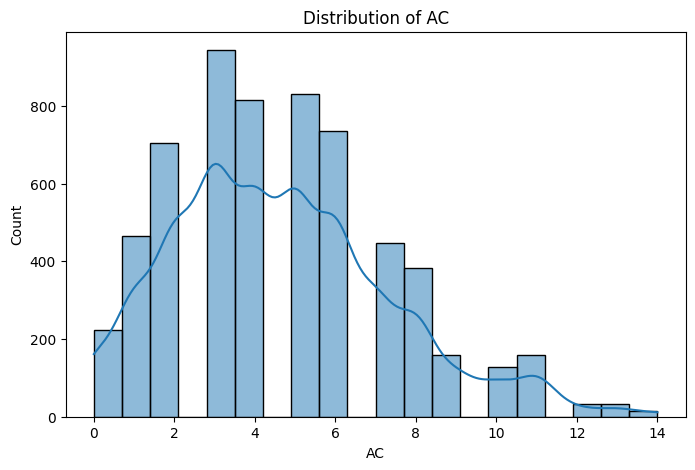

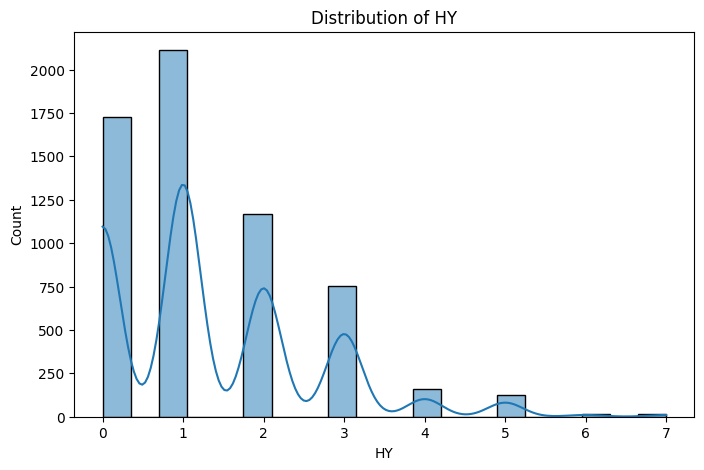

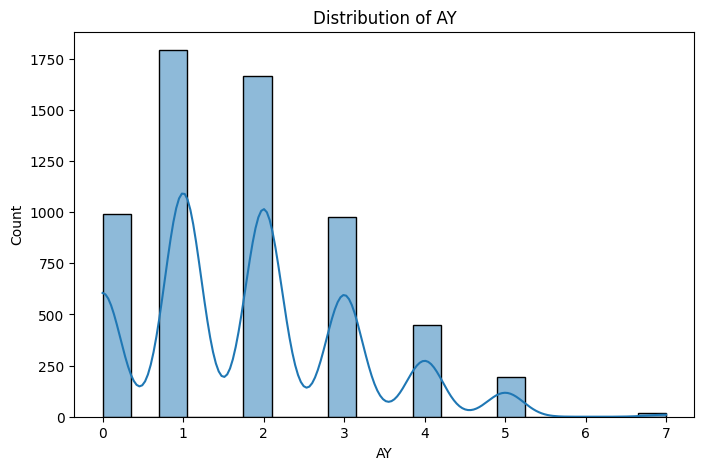

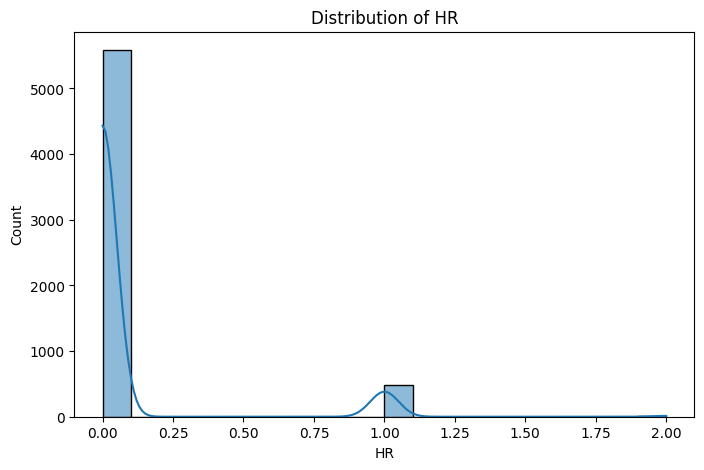

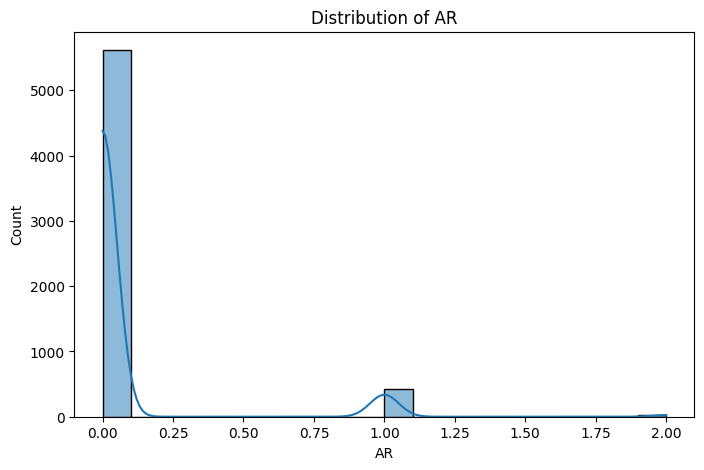

In [ ]:
# Distribution of all the columns.
numerical_columns = ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(mf[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}")
    plt.show()


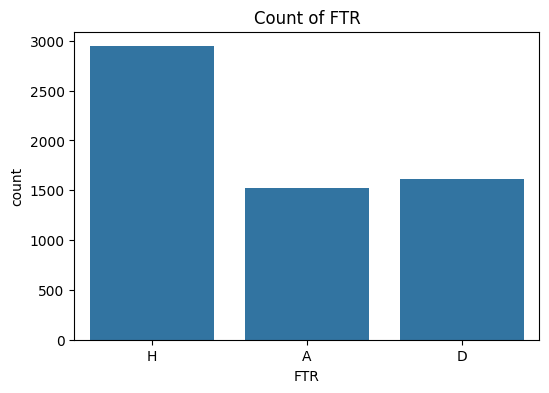

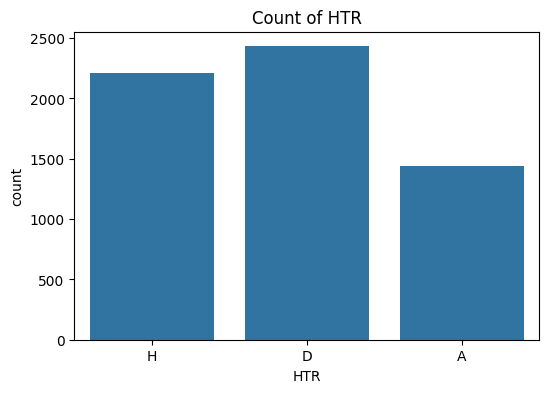

In [10]:
# Bar plot for categorical columns
categorical_columns = ['FTR', 'HTR']

for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=mf, x=column)
    plt.title(f"Count of {column}")
    plt.show()


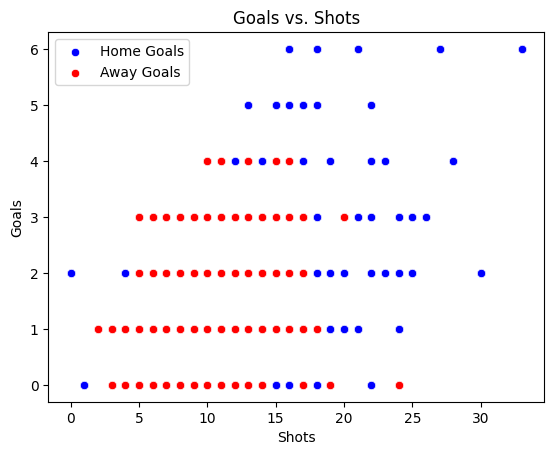

In [11]:
# Scatter plot for goals vs. shots
sns.scatterplot(data=mf, x='HS', y='FTHG', label='Home Goals', color='blue')
sns.scatterplot(data=mf, x='AS', y='FTAG', label='Away Goals', color='red')
plt.title("Goals vs. Shots")
plt.xlabel("Shots")
plt.ylabel("Goals")
plt.legend()
plt.show()


*Analyze the relationship between shots and goals for home and away teams:*

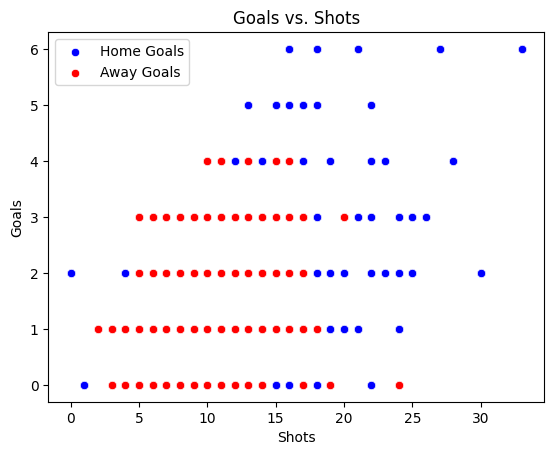

In [12]:
# Scatter plot for goals vs. shots
sns.scatterplot(data=mf, x='HS', y='FTHG', label='Home Goals', color='blue')
sns.scatterplot(data=mf, x='AS', y='FTAG', label='Away Goals', color='red')
plt.title("Goals vs. Shots")
plt.xlabel("Shots")
plt.ylabel("Goals")
plt.legend()
plt.show()


*Combined Home vs Away Team Performance metrix*

In [21]:
# Combine home and away stats for each metric
metrics = {
    'Shots on Target': ['HST', 'AST'],
    'Corners': ['HC', 'AC'],
    'Yellow Cards': ['HY', 'AY'],
    'Red Cards': ['HR', 'AR'],
    'Fouls': ['HF', 'AF']
}

# Aggregate metrics for each team
aggregated_data = {}

for metric, cols in metrics.items():
    home_col, away_col = cols
    # Create a team-based aggregation by summing home and away stats
    team_stats = (
        pd.concat([
            mf.groupby('HomeTeam')[home_col].sum(),
            mf.groupby('AwayTeam')[away_col].sum()
        ])
        .groupby(level=0)
        .sum()
    )
    aggregated_data[metric] = team_stats

# Convert aggregated data to a DataFrame for easier analysis
agg_df = pd.DataFrame(aggregated_data)


C:\Users\USER\AppData\Local\Temp\ipykernel_6776\2305789596.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


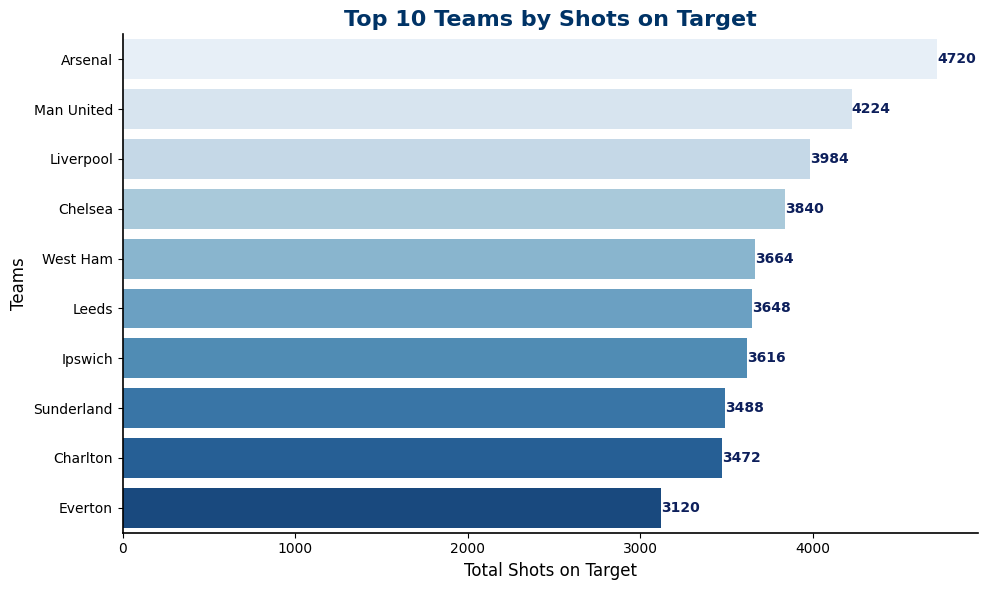

C:\Users\USER\AppData\Local\Temp\ipykernel_6776\2305789596.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


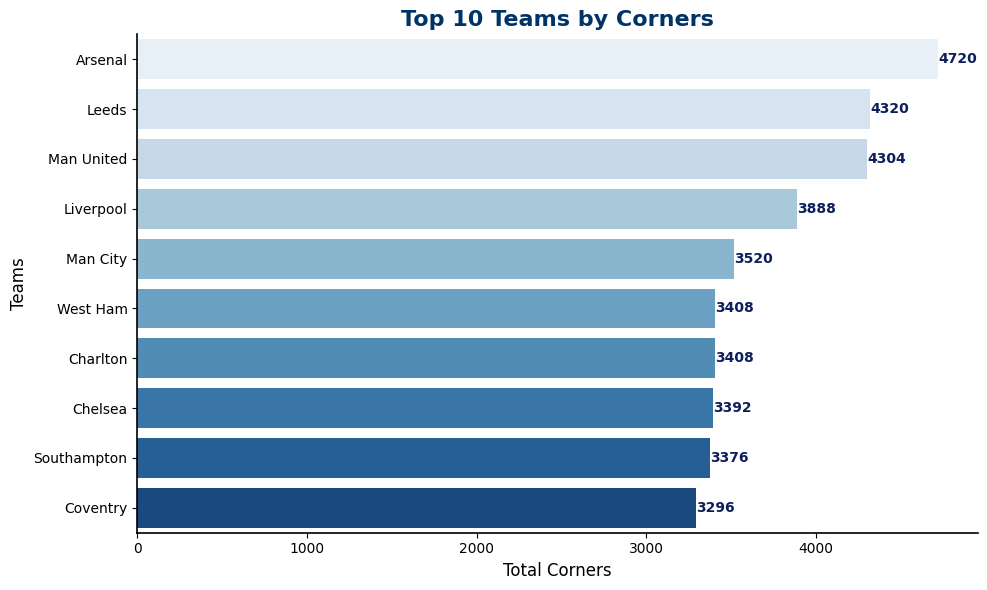

C:\Users\USER\AppData\Local\Temp\ipykernel_6776\2305789596.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


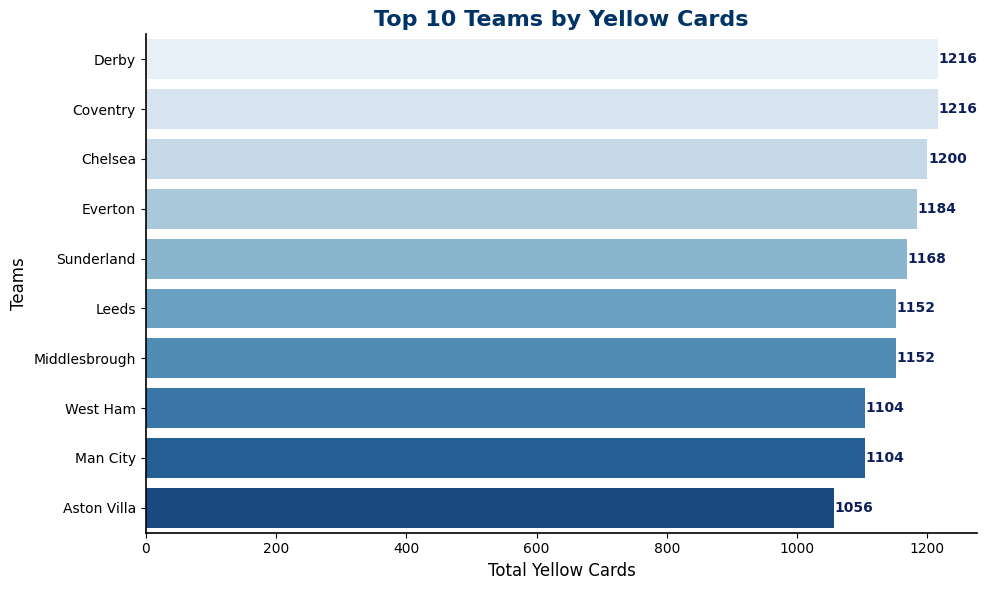

C:\Users\USER\AppData\Local\Temp\ipykernel_6776\2305789596.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


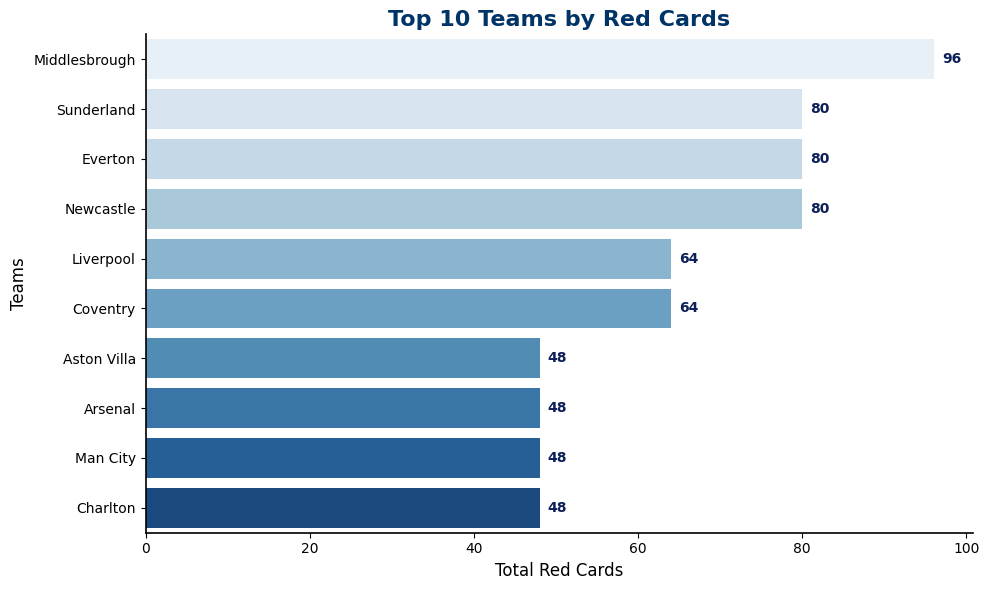

C:\Users\USER\AppData\Local\Temp\ipykernel_6776\2305789596.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


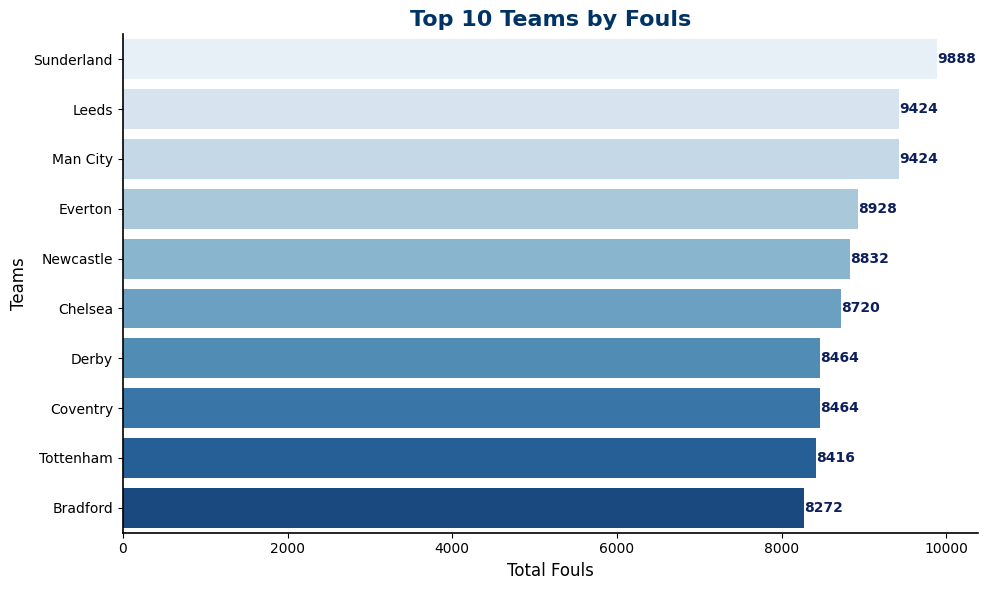

In [26]:
# Define a function to plot the top 10 teams for a given metric with a beautiful blue color scheme
def plot_top_teams_beautiful_blue(metric, data, title):
    top_teams = data[metric].sort_values(ascending=False).head(10)
    
    # Create a custom blue gradient palette
    palette = sns.color_palette("Blues", n_colors=10)
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=top_teams.values, 
        y=top_teams.index, 
        palette=palette
    )
    
    # Add annotations to each bar
    for i, value in enumerate(top_teams.values):
        plt.text(
            value + 1,  # Slightly offset from the bar
            i,          # Vertical position matches the bar
            f"{value}",  # Annotation text
            color="#0D1F5B",  # Dark blue for contrast
            ha="left", 
            va="center",
            fontsize=10,
            fontweight="bold"
        )
    
    # Customize the plot
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(1.2)
    ax.spines["bottom"].set_linewidth(1.2)
    plt.title(f"Top 10 Teams by {title}", fontsize=16, fontweight="bold", color="#003366")
    plt.xlabel(f"Total {title}", fontsize=12)
    plt.ylabel("Teams", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

# Loop through the metrics and plot with enhanced blue visuals
for metric in metrics.keys():
    plot_top_teams_beautiful_blue(metric, agg_df, metric)


C:\Users\USER\AppData\Local\Temp\ipykernel_6776\1077396224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mf, x='FTR', y='FTHG', palette="viridis")


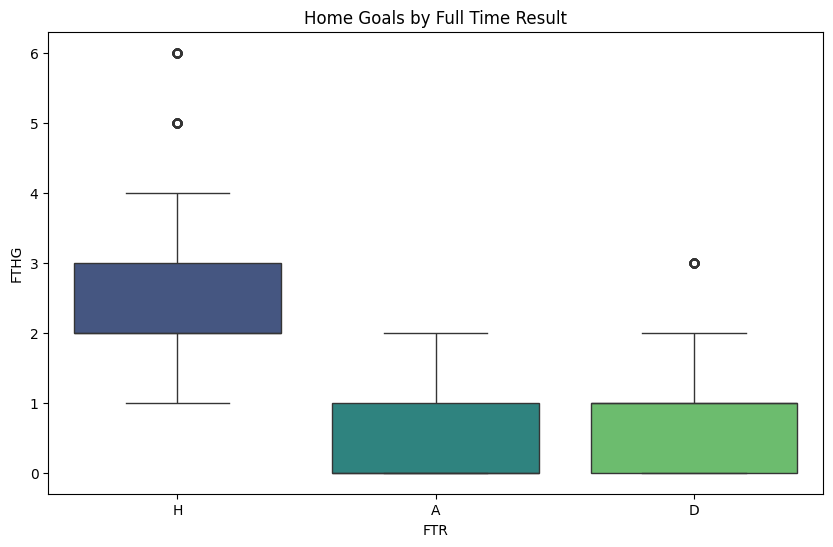

In [13]:
# Box plots for comparing team performances
plt.figure(figsize=(10, 6))
sns.boxplot(data=mf, x='FTR', y='FTHG', palette="viridis")
plt.title("Home Goals by Full Time Result")
plt.show()


Dataset Overview:
-----------------
Total matches analyzed: 6080

Goal Statistics:
-----------------
Average goals per match:
Home teams: 1.54
Away teams: 1.07

Match Outcomes:
-----------------
Home wins: 2944 (48.4%)
Away wins: 1520 (25.0%)
Draws: 1616 (26.6%)

Card Statistics:
-----------------
Average yellow cards per match: 3.14
Average red cards per match: 0.17

Shot Conversion Rates:
-----------------
Home team conversion rate: inf%
Away team conversion rate: 11.8%


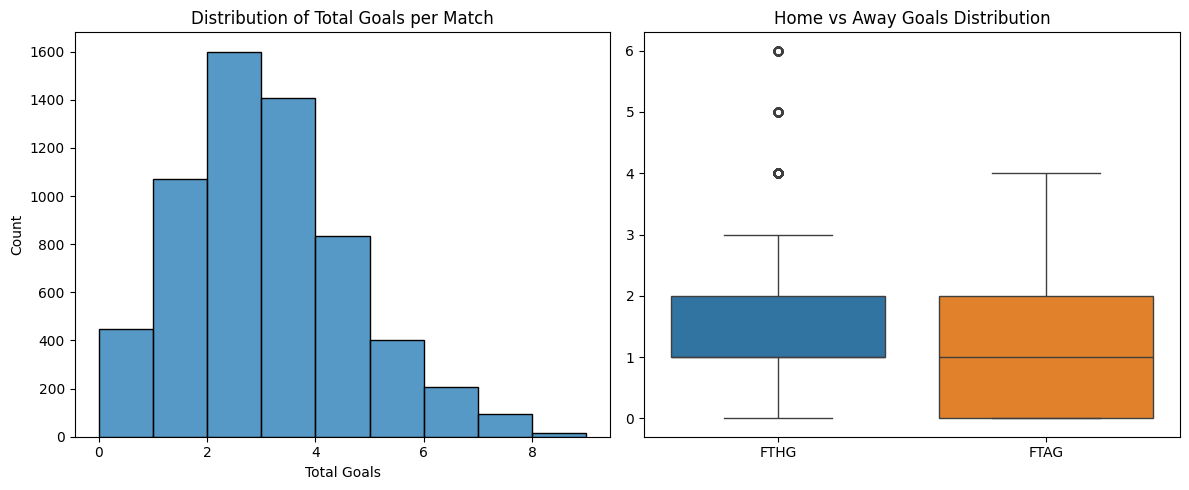

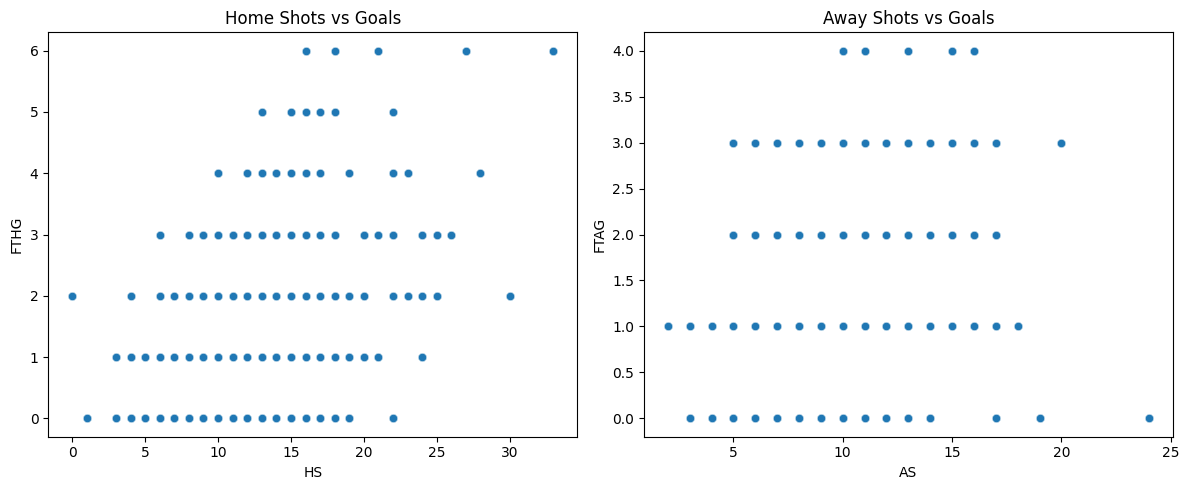

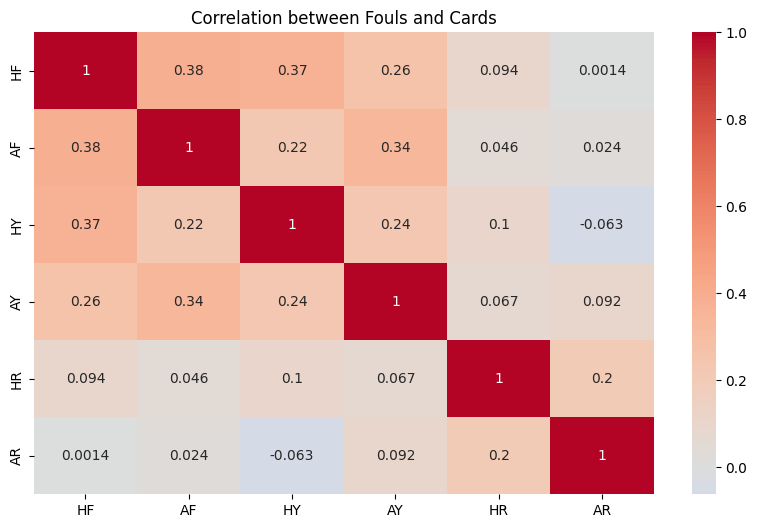

<Figure size 1000x600 with 0 Axes>

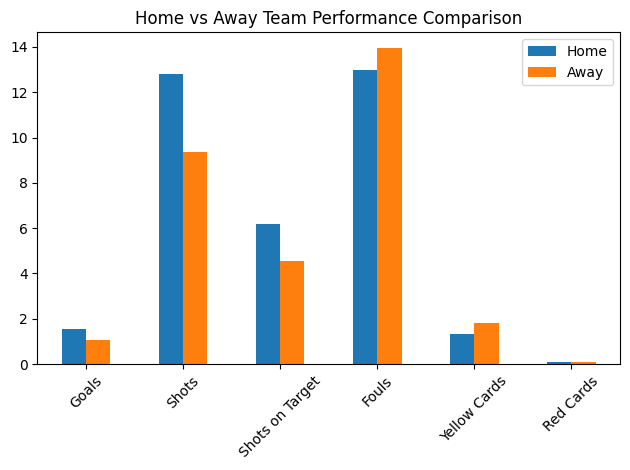

In [14]:
#Team statistics.

def analyze_football_data(mf):
    """
    Comprehensive analysis of football match statistics
    """
    # Basic statistics summary
    print("Dataset Overview:")
    print("-----------------")
    print(f"Total matches analyzed: {len(mf)}")
    # 1. Goal Analysis
    print("\nGoal Statistics:")
    print("-----------------")
    print("Average goals per match:")
    print(f"Home teams: {mf['FTHG'].mean():.2f}")
    print(f"Away teams: {mf['FTAG'].mean():.2f}")
    
    # Calculate total goals per match
    mf['TotalGoals'] = mf['FTHG'] + mf['FTAG']
    
    # 2. Result Analysis
    result_dist = mf['FTR'].value_counts()
    print("\nMatch Outcomes:")
    print("-----------------")
    print(f"Home wins: {result_dist['H']} ({result_dist['H']/len(mf)*100:.1f}%)")
    print(f"Away wins: {result_dist['A']} ({result_dist['A']/len(mf)*100:.1f}%)")
    print(f"Draws: {result_dist['D']} ({result_dist['D']/len(mf)*100:.1f}%)")
    
    # 3. Cards Analysis
    mf['TotalYellowCards'] = mf['HY'] + mf['AY']
    mf['TotalRedCards'] = mf['HR'] + mf['AR']
    
    print("\nCard Statistics:")
    print("-----------------")
    print(f"Average yellow cards per match: {mf['TotalYellowCards'].mean():.2f}")
    print(f"Average red cards per match: {mf['TotalRedCards'].mean():.2f}")
    
    # 4. Shot Conversion Analysis
    mf['HomeConversion'] = (mf['FTHG'] / mf['HS'] * 100).fillna(0)
    mf['AwayConversion'] = (mf['FTAG'] / mf['AS'] * 100).fillna(0)
    
    print("\nShot Conversion Rates:")
    print("-----------------")
    print(f"Home team conversion rate: {mf['HomeConversion'].mean():.1f}%")
    print(f"Away team conversion rate: {mf['AwayConversion'].mean():.1f}%")
    
    # Visualizations
    
    # 1. Goals Distribution
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=mf['TotalGoals'], bins=range(0, mf['TotalGoals'].max()+2, 1))
    plt.title('Distribution of Total Goals per Match')
    plt.xlabel('Total Goals')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=mf[['FTHG', 'FTAG']])
    plt.title('Home vs Away Goals Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Shot Analysis
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=mf, x='HS', y='FTHG', alpha=0.5)
    plt.title('Home Shots vs Goals')
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=mf, x='AS', y='FTAG', alpha=0.5)
    plt.title('Away Shots vs Goals')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Cards and Fouls Correlation
    plt.figure(figsize=(10, 6))
    correlation_matrix = mf[['HF', 'AF', 'HY', 'AY', 'HR', 'AR']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation between Fouls and Cards')
    plt.show()
    
    # 4. Home Advantage Analysis
    home_stats = pd.DataFrame({
        'Home': [mf['FTHG'].mean(), mf['HS'].mean(), mf['HST'].mean(), 
                mf['HF'].mean(), mf['HY'].mean(), mf['HR'].mean()],
        'Away': [mf['FTAG'].mean(), mf['AS'].mean(), mf['AST'].mean(), 
                mf['AF'].mean(), mf['AY'].mean(), mf['AR'].mean()]
    }, index=['Goals', 'Shots', 'Shots on Target', 'Fouls', 'Yellow Cards', 'Red Cards'])
    
    plt.figure(figsize=(10, 6))
    home_stats.plot(kind='bar')
    plt.title('Home vs Away Team Performance Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return {
        'total_matches': len(mf),
        'home_win_rate': result_dist['H']/len(mf),
        'avg_goals_per_match': mf['TotalGoals'].mean(),
        'home_shot_conversion': mf['HomeConversion'].mean(),
        'away_shot_conversion': mf['AwayConversion'].mean()
    }

# To use this analysis, run:
results = analyze_football_data(mf)

In [15]:
# Calculate the combined shots on target for both teams
mf['TotalShotsOnTarget'] = mf['HST'] + mf['AST']

# Calculate the combined corners for both teams
mf['TotalCorners'] = mf['HC'] + mf['AC']

# Calculate the combined fouls for both teams
mf['TotalFouls'] = mf['HF'] + mf['AF']

# Calculate the average combined shots on target
avg_combined_shots_on_target = mf['TotalShotsOnTarget'].mean()

# Calculate the average combined corners
avg_combined_corners = mf['TotalCorners'].mean()

# Calculate the average combined fouls
avg_combined_fouls = mf['TotalFouls'].mean()

# Print the results
print(f"Average Combined Shots on Target: {avg_combined_shots_on_target:.2f}")
print(f"Average Combined Corners: {avg_combined_corners:.2f}")
print(f"Average Combined Fouls: {avg_combined_fouls:.2f}")


Average Combined Shots on Target: 10.69
Average Combined Corners: 10.94
Average Combined Fouls: 26.92


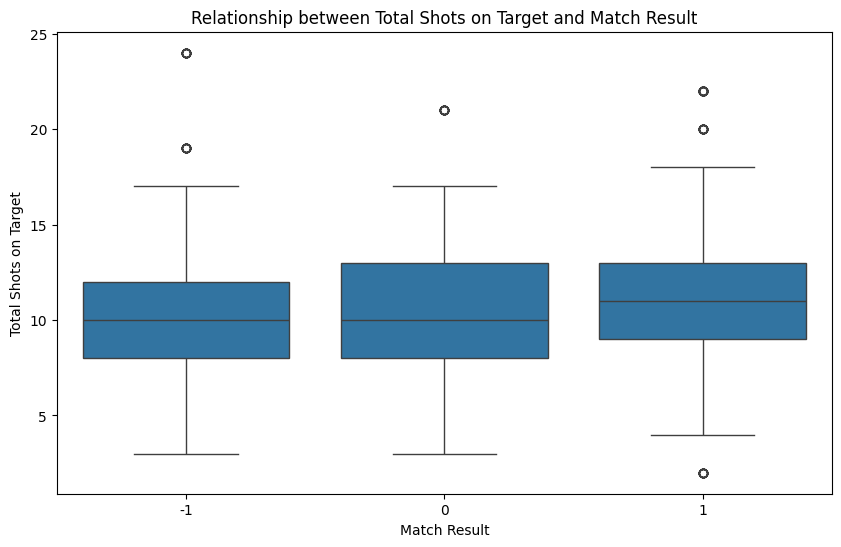

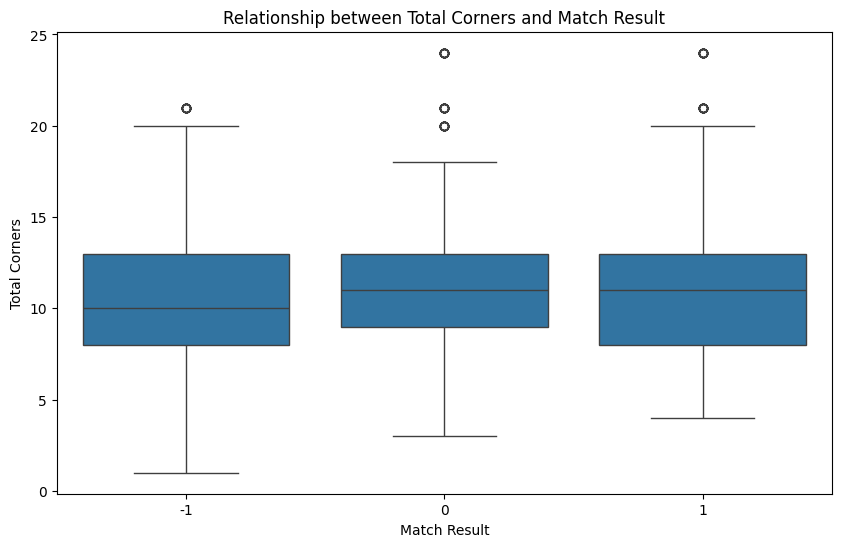

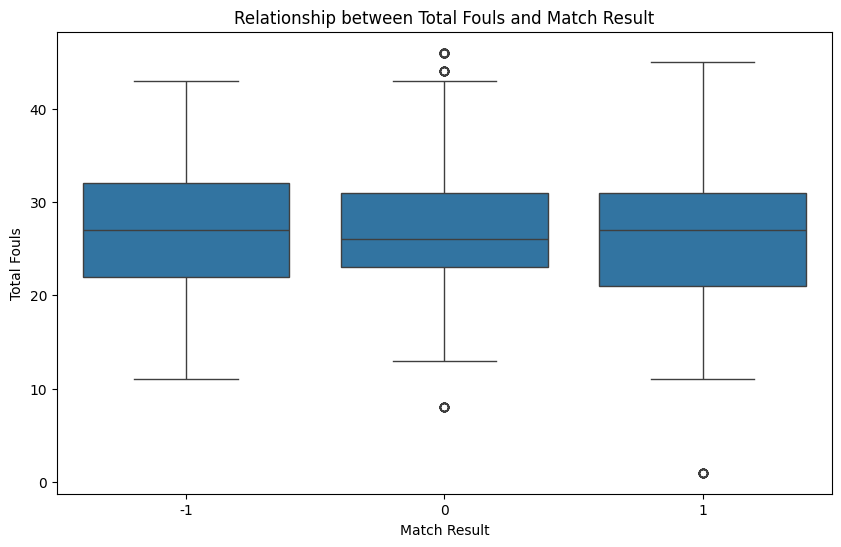

In [16]:
mf['Result'] = mf['FTR'].map({'H': 1, 'A': -1, 'D': 0})

# Visualize the relationship between shots on target and match result
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='TotalShotsOnTarget', data=mf)
plt.title('Relationship between Total Shots on Target and Match Result')
plt.xlabel('Match Result')
plt.ylabel('Total Shots on Target')
plt.show()

# Visualize the relationship between corners and match result
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='TotalCorners', data=mf)
plt.title('Relationship between Total Corners and Match Result')
plt.xlabel('Match Result')
plt.ylabel('Total Corners')
plt.show()

# Visualize the relationship between fouls and match result
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='TotalFouls', data=mf)
plt.title('Relationship between Total Fouls and Match Result')
plt.xlabel('Match Result')
plt.ylabel('Total Fouls')
plt.show()


# MACHINE LEARNING MODELS;

# Preprocessing; Prepare the dataset for machine learning

In [17]:
#PREPROCESSING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
mf['FTR_encoded'] = encoder.fit_transform(mf['FTR'])

# Features and target
X = mf[['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
y = mf['FTR_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LOGISTIC REGRESSION

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       326
           2       1.00      1.00      1.00       581

    accuracy                           1.00      1216
   macro avg       1.00      1.00      1.00      1216
weighted avg       1.00      1.00      1.00      1216



c:\Users\USER\.vscode\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RANDOM FOREST CLASSIFIER

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       326
           2       1.00      1.00      1.00       581

    accuracy                           1.00      1216
   macro avg       1.00      1.00      1.00      1216
weighted avg       1.00      1.00      1.00      1216



# Feature Importance and Insights

*Feature Importance from Random Forest*

C:\Users\USER\AppData\Local\Temp\ipykernel_6776\2457042050.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


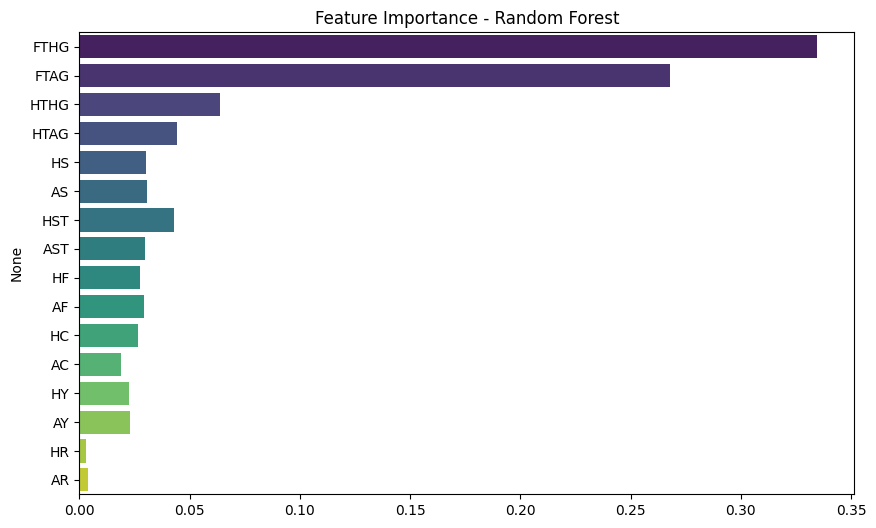

In [20]:
# Plot feature importance
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()
